In [ ]:
!nvidia-smi

Thu Aug 22 22:30:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P8                3W /  N/A|      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import Wang2016
from moabb.evaluations import WithinSessionEvaluation
from moabb.paradigms import SSVEP
from moabb.pipelines import SSVEP_CCA


warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
moabb.set_log_level("info")

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
c:\Users\machi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


To use the get_shape_from_baseconcar, InputShapeSetterEEG, BraindecodeDatasetLoaderyou need to install `braindecode`.`pip install braindecode` or Please refer to `https://braindecode.org`.


c:\Users\machi\anaconda3\Lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [3]:
channel = "Oz"
events = ["8", "15"]
dataset = Wang2016()
subj = [1]
dataset.subject_list = subj

In [4]:
dataset.subject_list

[1]

In [5]:
sessions = dataset.get_data()
sessions

2024-09-05 21:00:29,904 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


{1: {'0': {'0': <RawArray | 65 x 384000 (1536.0 s), ~190.5 MB, data loaded>}}}

In [6]:
sessions[1]["0"]["0"].annotations.description

array(['8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '10',
       '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11',
       '12', '12', '12', '12', '12', '12', '13', '13', '13', '13', '13',
       '13', '14', '14', '14', '14', '14', '14', '15', '15', '15', '15',
       '15', '15', '8.2', '8.2', '8.2', '8.2', '8.2', '8.2', '9.2', '9.2',
       '9.2', '9.2', '9.2', '9.2', '10.2', '10.2', '10.2', '10.2', '10.2',
       '10.2', '11.2', '11.2', '11.2', '11.2', '11.2', '11.2', '12.2',
       '12.2', '12.2', '12.2', '12.2', '12.2', '13.2', '13.2', '13.2',
       '13.2', '13.2', '13.2', '14.2', '14.2', '14.2', '14.2', '14.2',
       '14.2', '15.2', '15.2', '15.2', '15.2', '15.2', '15.2', '8.4',
       '8.4', '8.4', '8.4', '8.4', '8.4', '9.4', '9.4', '9.4', '9.4',
       '9.4', '9.4', '10.4', '10.4', '10.4', '10.4', '10.4', '10.4',
       '11.4', '11.4', '11.4', '11.4', '11.4', '11.4', '12.4', '12.4',
       '12.4', '12.4', '12.4', '12.4', '13.4', '13.4', '13.4', '1

In [10]:
sessions[1]["0"]["0"].shape

AttributeError: 'RawArray' object has no attribute 'shape'

In [ ]:
subj = [1, 3]
dataset = Wang2016()
# dataset.subject_list = subj
# paradigm = SSVEP(fmin=3, fmax=15, n_classes=3)
paradigm = SSVEP(events=events, n_classes=2)
interval = dataset.interval
freqs = paradigm.used_events(dataset)

pipeline = {}
pipeline["CCA"] = make_pipeline(
    SSVEP_CCA(interval=interval, freqs=freqs, n_harmonics=3)
)

In [ ]:
X, labels, meta = paradigm.get_data(dataset=dataset)

2024-08-22 22:48:12,356 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data
2024-08-22 22:48:15,150 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data
2024-08-22 22:48:17,979 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data
2024-08-22 22:48:20,870 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data
2024-08-22 22:48:23,635 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data
2024-08-22 22:48:26,401 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data
2024-08-22 22:48:29,364 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buff

In [ ]:
labels

array(['8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '15', '15', '15', '15',
       '8', '8', '8', '8', '8', '8', '15', '15', '1

In [ ]:
overwrite = True  # set to True if we want to overwrite cached results

evaluation = WithinSessionEvaluation(
    paradigm=paradigm, datasets=dataset, suffix="examples", overwrite=overwrite
)
results = evaluation.process(pipeline)

print(results.head())

2024-08-22 22:44:31,608 INFO MainThread moabb.evaluations.base Processing dataset: Wang2016
Wang2016-WithinSession:   0%|                                                                   | 0/34 [00:00<?, ?it/s]2024-08-22 22:44:33,572 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:44:36,242 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 1 | 0: Score 0.000
Wang2016-WithinSession:   3%|█▋                                                         | 1/34 [00:04<02:43,  4.95s/it]2024-08-22 22:44:38,872 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:44:41,118 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 2 | 0: Score 0.000
Wang2016-WithinSession:   6%|███▍                                                       | 2/34 [00:09<02:35,  4.86s/it]2024-08-22 22:44:43,096 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:44:45,185 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 3 | 0: Score 0.000
Wang2016-WithinSession:   9%|█████▏                                                     | 3/34 [00:13<02:19,  4.50s/it]2024-08-22 22:44:47,287 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:44:49,241 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 4 | 0: Score 0.000
Wang2016-WithinSession:  12%|██████▉                                                    | 4/34 [00:17<02:09,  4.32s/it]2024-08-22 22:44:51,170 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:44:53,149 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 5 | 0: Score 0.000
Wang2016-WithinSession:  15%|████████▋                                                  | 5/34 [00:21<02:01,  4.18s/it]2024-08-22 22:44:55,250 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:44:57,051 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 6 | 0: Score 0.000
Wang2016-WithinSession:  18%|██████████▍                                                | 6/34 [00:25<01:53,  4.07s/it]2024-08-22 22:44:59,038 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:00,743 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 7 | 0: Score 0.000
Wang2016-WithinSession:  21%|████████████▏                                              | 7/34 [00:29<01:46,  3.96s/it]2024-08-22 22:45:02,898 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:04,773 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 8 | 0: Score 0.000
Wang2016-WithinSession:  24%|█████████████▉                                             | 8/34 [00:33<01:43,  3.99s/it]2024-08-22 22:45:06,886 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:08,608 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 9 | 0: Score 0.050
Wang2016-WithinSession:  26%|███████████████▌                                           | 9/34 [00:37<01:37,  3.92s/it]2024-08-22 22:45:10,510 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:12,196 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 10 | 0: Score 0.000
Wang2016-WithinSession:  29%|█████████████████                                         | 10/34 [00:40<01:31,  3.81s/it]2024-08-22 22:45:14,120 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:15,750 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 11 | 0: Score 0.000
Wang2016-WithinSession:  32%|██████████████████▊                                       | 11/34 [00:44<01:26,  3.76s/it]2024-08-22 22:45:17,722 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:19,460 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 12 | 0: Score 0.000
Wang2016-WithinSession:  35%|████████████████████▍                                     | 12/34 [00:48<01:21,  3.72s/it]2024-08-22 22:45:21,363 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:23,179 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 13 | 0: Score 0.000
Wang2016-WithinSession:  38%|██████████████████████▏                                   | 13/34 [00:51<01:18,  3.72s/it]2024-08-22 22:45:25,077 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:26,708 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 14 | 0: Score 0.000
Wang2016-WithinSession:  41%|███████████████████████▉                                  | 14/34 [00:55<01:13,  3.67s/it]2024-08-22 22:45:28,662 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:30,366 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 15 | 0: Score 0.000
Wang2016-WithinSession:  44%|█████████████████████████▌                                | 15/34 [00:58<01:09,  3.65s/it]2024-08-22 22:45:32,207 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:33,926 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 16 | 0: Score 0.000
Wang2016-WithinSession:  47%|███████████████████████████▎                              | 16/34 [01:02<01:05,  3.63s/it]2024-08-22 22:45:35,797 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:37,388 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 17 | 0: Score 0.000
Wang2016-WithinSession:  50%|█████████████████████████████                             | 17/34 [01:06<01:01,  3.59s/it]2024-08-22 22:45:39,311 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:40,975 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 18 | 0: Score 0.000
Wang2016-WithinSession:  53%|██████████████████████████████▋                           | 18/34 [01:09<00:57,  3.59s/it]2024-08-22 22:45:42,914 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:44,591 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 19 | 0: Score 0.080
Wang2016-WithinSession:  56%|████████████████████████████████▍                         | 19/34 [01:13<00:53,  3.58s/it]2024-08-22 22:45:46,431 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:48,148 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 20 | 0: Score 0.000
Wang2016-WithinSession:  59%|██████████████████████████████████                        | 20/34 [01:16<00:50,  3.59s/it]2024-08-22 22:45:50,199 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:51,819 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 21 | 0: Score 0.000
Wang2016-WithinSession:  62%|███████████████████████████████████▊                      | 21/34 [01:20<00:46,  3.61s/it]2024-08-22 22:45:53,816 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:55,570 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 22 | 0: Score 0.000
Wang2016-WithinSession:  65%|█████████████████████████████████████▌                    | 22/34 [01:24<00:43,  3.66s/it]2024-08-22 22:45:57,752 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:45:59,461 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 23 | 0: Score 0.040
Wang2016-WithinSession:  68%|███████████████████████████████████████▏                  | 23/34 [01:28<00:40,  3.73s/it]2024-08-22 22:46:01,519 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:03,052 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 24 | 0: Score 0.000
Wang2016-WithinSession:  71%|████████████████████████████████████████▉                 | 24/34 [01:31<00:36,  3.68s/it]2024-08-22 22:46:05,134 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:07,098 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 25 | 0: Score 0.000
Wang2016-WithinSession:  74%|██████████████████████████████████████████▋               | 25/34 [01:35<00:34,  3.80s/it]2024-08-22 22:46:09,263 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:11,722 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 26 | 0: Score 0.000
Wang2016-WithinSession:  76%|████████████████████████████████████████████▎             | 26/34 [01:40<00:32,  4.07s/it]2024-08-22 22:46:14,593 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:16,860 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 27 | 0: Score 0.000
Wang2016-WithinSession:  79%|██████████████████████████████████████████████            | 27/34 [01:45<00:30,  4.37s/it]2024-08-22 22:46:19,277 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:21,040 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 28 | 0: Score 0.000
Wang2016-WithinSession:  82%|███████████████████████████████████████████████▊          | 28/34 [01:49<00:25,  4.31s/it]2024-08-22 22:46:23,457 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:25,387 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 29 | 0: Score 0.000
Wang2016-WithinSession:  85%|█████████████████████████████████████████████████▍        | 29/34 [01:54<00:21,  4.32s/it]2024-08-22 22:46:27,491 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:29,401 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 30 | 0: Score 0.000
Wang2016-WithinSession:  88%|███████████████████████████████████████████████████▏      | 30/34 [01:58<00:16,  4.23s/it]2024-08-22 22:46:31,535 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:33,326 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 31 | 0: Score 0.000
Wang2016-WithinSession:  91%|████████████████████████████████████████████████████▉     | 31/34 [02:01<00:12,  4.14s/it]2024-08-22 22:46:35,343 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:37,109 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 32 | 0: Score 0.000
Wang2016-WithinSession:  94%|██████████████████████████████████████████████████████▌   | 32/34 [02:05<00:08,  4.02s/it]2024-08-22 22:46:39,294 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:40,989 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 33 | 0: Score 0.080
Wang2016-WithinSession:  97%|████████████████████████████████████████████████████████▎ | 33/34 [02:09<00:03,  3.97s/it]2024-08-22 22:46:42,956 WARNING MainThread moabb.datasets.ssvep_wang Trial data de-meaned and concatenated with a buffer to create continuous data


No hdf5_path provided, models will not be saved.


2024-08-22 22:46:44,516 INFO MainThread moabb.evaluations.base CCA | Wang2016 | 34 | 0: Score 0.000
Wang2016-WithinSession: 100%|██████████████████████████████████████████████████████████| 34/34 [02:13<00:00,  3.92s/it]

   score      time  samples subject session  channels  n_sessions   dataset  \
0    0.0  0.253852     24.0       1       0        62           1  Wang2016   
1    0.0  0.205688     24.0       2       0        62           1  Wang2016   
2    0.0  0.179278     24.0       3       0        62           1  Wang2016   
3    0.0  0.151099     24.0       4       0        62           1  Wang2016   
4    0.0  0.169144     24.0       5       0        62           1  Wang2016   

  pipeline  
0      CCA  
1      CCA  
2      CCA  
3      CCA  
4      CCA  


In [ ]:
results

,score,time,samples,subject,session,channels,n_sessions,dataset,pipeline
0,0.00,0.253852,24.0,1,0,62,1,Wang2016,CCA
1,0.00,0.205688,24.0,2,0,62,1,Wang2016,CCA
2,0.00,0.179278,24.0,3,0,62,1,Wang2016,CCA
3,0.00,0.151099,24.0,4,0,62,1,Wang2016,CCA
4,0.00,0.169144,24.0,5,0,62,1,Wang2016,CCA
5,0.00,0.143857,24.0,6,0,62,1,Wang2016,CCA
6,0.00,0.157163,24.0,7,0,62,1,Wang2016,CCA
7,0.00,0.160106,24.0,8,0,62,1,Wang2016,CCA
8,0.05,0.151308,24.0,9,0,62,1,Wang2016,CCA
9,0.00,0.146969,24.0,10,0,62,1,Wang2016,CCA


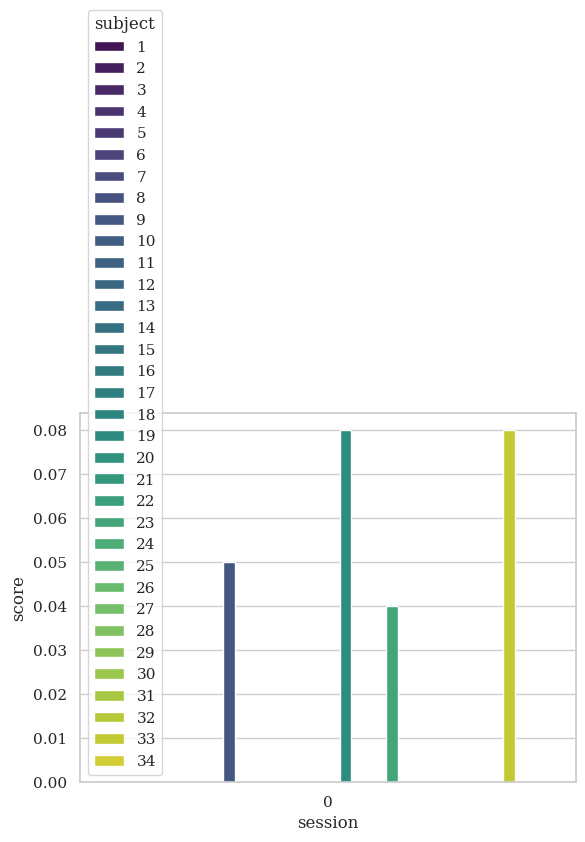

In [ ]:
plt.figure()
sns.barplot(data=results, y="score", x="session", hue="subject", palette="viridis")
plt.show()